In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
raw_hic_path = '/data1/lmh_data/MINE/use_data/GM12878/hr'
completed_hic_path = '/data1/lmh_data/MINE/use_data/GM12878/replaced'
enhanced_hic_path ='/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/GM12878_ATAC_H3K27ac_H3K4me3/validation'
annotation_path = '/data1/lmh_data/MINE/use_data/GM12878/ATAC_H3K27ac_H3K4me3/annotation'
epi_path = '/data1/lmh_data/MINE/use_data/GM12878/ATAC_H3K27ac_H3K4me3/epi'

In [3]:
chrom, index, x, y = 8, 224, 100, 400

filename = 'chr{}_1000b.npz'.format(chrom)
raw_hic = np.load(os.path.join(raw_hic_path, filename))['hic']
completed_hic = np.load(os.path.join(completed_hic_path, filename))['hic']
enhanced_hic = np.load(os.path.join(enhanced_hic_path, filename))['out']
mask = np.load(os.path.join(annotation_path, filename))['hic']
epi = np.load(os.path.join(epi_path, filename))['epi']

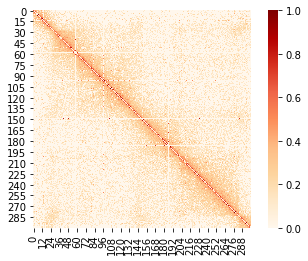

In [4]:
_matrix = np.log1p(raw_hic[index, 0, x:y, x:y].copy())
row, col = np.diag_indices_from(_matrix)
_matrix[row, col] = 0
_matrix = _matrix/_matrix.max()
sns.heatmap(_matrix, square=True, cmap="OrRd")
plt.savefig('figure_file/case_matrix/raw_hic.pdf', format='pdf', bbox_inches='tight')
plt.show()

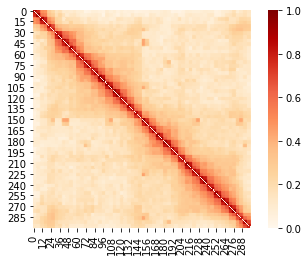

In [5]:
_matrix = np.log1p(completed_hic[index, 0, x:y, x:y].copy())
row, col = np.diag_indices_from(_matrix)
_matrix[row, col] = 0
_matrix = _matrix/_matrix.max()
sns.heatmap(_matrix, square=True, cmap="OrRd")
plt.savefig('figure_file/case_matrix/completed_hic.pdf', format='pdf', bbox_inches='tight')
plt.show()

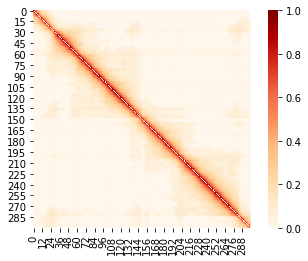

In [6]:
_matrix = enhanced_hic[index, 0, x:y, x:y].copy()
row, col = np.diag_indices_from(_matrix)
_matrix[row, col] = 0
_matrix = _matrix/_matrix.max()
sns.heatmap(_matrix, square=True, cmap="OrRd")
plt.savefig('figure_file/case_matrix/enhanced_hic.pdf', format='pdf', bbox_inches='tight')
plt.show()

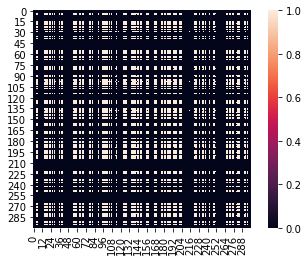

In [7]:
_matrix = mask[index, 0, x:y, x:y].copy()
sns.heatmap(_matrix, square=True)
plt.savefig('figure_file/case_matrix/mask.pdf', format='pdf', bbox_inches='tight')
plt.show()

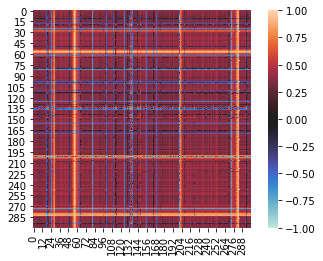

In [8]:
_matrix = epi[index, 0, x:y, x:y].copy()

_negative = _matrix < 0
_matrix[_negative] *= -1
_matrix = np.log1p(_matrix)
_matrix = _matrix/_matrix.max()
_matrix[_negative] *= -1

sns.heatmap(_matrix, square=True, center=0, vmin=-1, vmax=1)
plt.savefig('figure_file/case_matrix/epi.pdf', format='pdf', bbox_inches='tight')
plt.show()